In [3]:
# Getting Python ready
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap
from scipy.special import comb
from matplotlib.colors import ListedColormap
#%matplotlib widget

We want to perform an experiment that has a certain number of independent trials (repeats) of tossing a coin.

We don't toss a real coin, just use a function that comes close to simulating a coin

    aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0])

The first argument is a random number Generator that enables simulations requiring generation of random outcomes. The rest of the arguments should be self-explanatory. We have the Bernoulli parameter (the probability p of heads/ the event of interest), the number of repeats of an experiment, and the number of trials (number of coin tosses) in an experiment.

Heads is mapped to profitLoss[0] and Tails is mapped to profitLoss[1]. By default the mapping is as that for a Bernoulli RV.

In [ ]:
def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):

    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))


    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))
    index_ge1 = np.less_equal(observation, bernoulliParam_p)
    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]
    return observation



Frequentist performs an experiment that has numTrialsInAnExp=1 independent trials (repeats) of tossing a coin.

Frequentist may repeat the above experiment numRepeatsOfExp times.

The outcome of the first experiment is observation[0][0]

The outcome of the second experiment is observation[1][0]

The outcome of the third experiment is observation[2][0]

... and so on

Note that each experiment's outcome is governed by the same Bernoulli(p) RV. As we increase the number of experiments, the histogram of the outcomes of the experiments begins to look more and more like the PMF of the Bernoulli(p) RV.

PS: We will use numTrialsInAnExp > 1 when we simulate a Binomial RV.


In [ ]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 1
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])

#print(observation)


The histogram values are: [17  3]
The histogram values are: [0.  0.5 1. ]


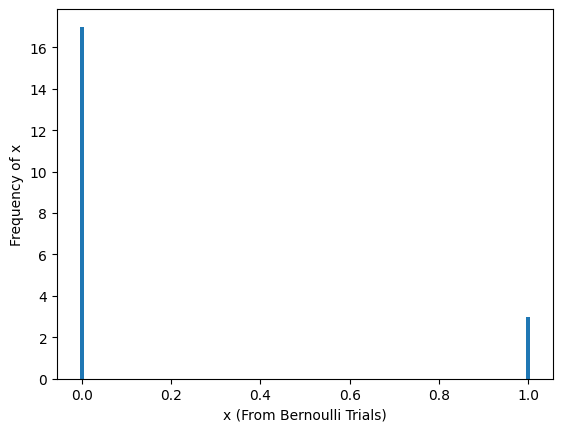

In [ ]:
#Prints and plots
# print(("The array of observations (1 row per experiment repeat):", observation))
# print(("Frequency of ones  (1 row per experiment repeat):",np.sum(observation,axis=1)))

fig1, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True)

histVal = np.histogram(observation, bins=[0,0.5,1],density=False)
#histVal = ax1.hist(observation[0][:], bins=range(0,2), density=False, align='left')

print("The histogram values are:", histVal[0])
print("The histogram values are:", histVal[1])
#print("The histogram values are:", histVal[1][0,2])

ax1.bar([0, 1], histVal[0]/v_numRepeatsOfExp, width = 0.01)

ax1.set_xlabel("x (From Bernoulli Trials)")
ax1.set_ylabel("Frequency of x")
fig1.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))

Observation 1(a)

---

The above histogram illustrates that the observation 1 was obtained 3 times out of the 20 trials of the experiment conducted and 0 was obtained 17 times.

This is evidenced by the fact the probability of obtaining a zero is 0.8 which is 4 times the probability of obtaining a one- 0.2 which makes it more likely to obtain a zero than a one.

The classical(observed) probability of obtaining a 1 is therefore- 0.15(3/20)

The probability of obtaining a 1 according to the given PMF-0.2

Thus, we are slightly off in out estimation of probability of obtaining a one-0.05 to be precise.

As I tweaked certain values in the experiment-increasing the number of trials, the probability approached the value of 0.2 which suggests that as number of trials are increased, we are more likely to have zero error and perfect estimation of probabilty.

In [ ]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 5
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1235), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])
for i in range(5):
  print(observation[i].tolist())



[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In part 1(b), we have to repeat the experiment in part 1(a) five times which is why we set the number of repeats variable to 5 and run the function to get the above observations.

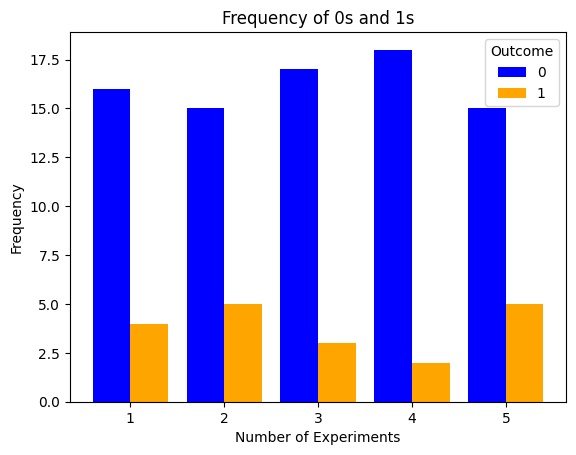

In [ ]:
num_experiments = np.arange(1, 6)
observations = np.array(observation)

fig, ax = plt.subplots()
for i, obs in enumerate(observations, start=1):
    hist_val = np.histogram(obs, bins=[0, 0.5, 1], density=False)
    ax.bar(num_experiments[i - 1], hist_val[0][0], color='blue', width=0.4, label='0' if i == 1 else None)
    ax.bar(num_experiments[i - 1] + 0.4, hist_val[0][1], color='orange', width=0.4, label='1' if i == 1 else None)

ax.set_xlabel("Number of Experiments")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of 0s and 1s")
ax.legend(title="Outcome")
ax.set_xticks(num_experiments + 0.2)
ax.set_xticklabels(num_experiments)

plt.show()

Observation 1(b)

---

The values of p(the probability of obtaining a one as taken from the observations-the observed probability) are:

For experiment 1: 4/20 = 0.2

For experiment 2: 5/20 = 0.25

For experiment 3: 3/20 = 0.15

For experiment 4: 2/20 = 0.1

For experiment 5: 5/20 = 0.25

All these values are evidenced again by the fact that the probability of obtaining a zero according to the PMF is 0.8 which suggests that it is highly more likely to obtain a zero rather than a one which puts sense into these low values of observed probabilities.

Also, according to the PMF, the probaility of obtaining a one should have been 0.2 which means there are erros in our estimation of probability ranging from (-0.5 to 0.5). We also get correct probabilities in some cases which suggests that the process is random and the number of ones obtained can vary in each experiment.

In [ ]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 100
v_bernoulliParam_p = 0.2
observations2 = aBernoulliExperiment(np.random.default_rng(1235), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])
for i in range(100):
  print(observations2[i].tolist())

[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Total number of ones in the 100 experiments:  383.0
Observed Probability of one:  0.1915


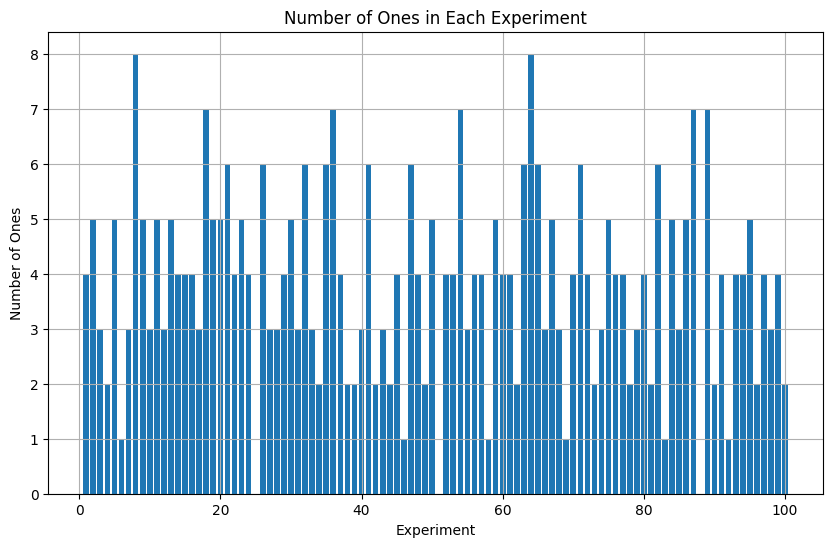

In [ ]:
for i in range(100):
  observations2[i]=observations2[i].tolist()
num_ones = [sum(obs) for obs in observations2]

total_ones=sum(num_ones)
print("Total number of ones in the 100 experiments: ",total_ones)
print("Observed Probability of one: ", total_ones/2000)
# Plot the number of ones
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(num_ones) + 1), num_ones)
plt.xlabel('Experiment')
plt.ylabel('Number of Ones')
plt.title('Number of Ones in Each Experiment')
plt.grid(True)
plt.show()

Observation 1(c)

---


The given histogram represents the number of 1s obtained in 20 trials each of 100 experiments.

The lowest frequency of 1 is 0 and the highest is 8 which is again evidenced by the fact that the probability of obatining a zero from the PMF is four times the probability of obtaining a one which makes it more likely to obtain a zero than a one.

We see that the number of 1s in each experiment is quite random but the total number of ones obtained in 2000 trials(20*100) is 383 which gives an observed probability of 0.1915 which approximates nearly the Bernoulli PMF of p=0.2 which is somewhat what I randomly observed in the part(a) when I tweaked the value of the number of trials. In this case, we increased the number of repeats instead of trials in each experiment, but in turn it correspondingly increased the number of trials as whole only.



Total such sequences:  77
Total number of ones in the 77 experiments: 349.0
Observed Probability of one: 0.22662337662337662


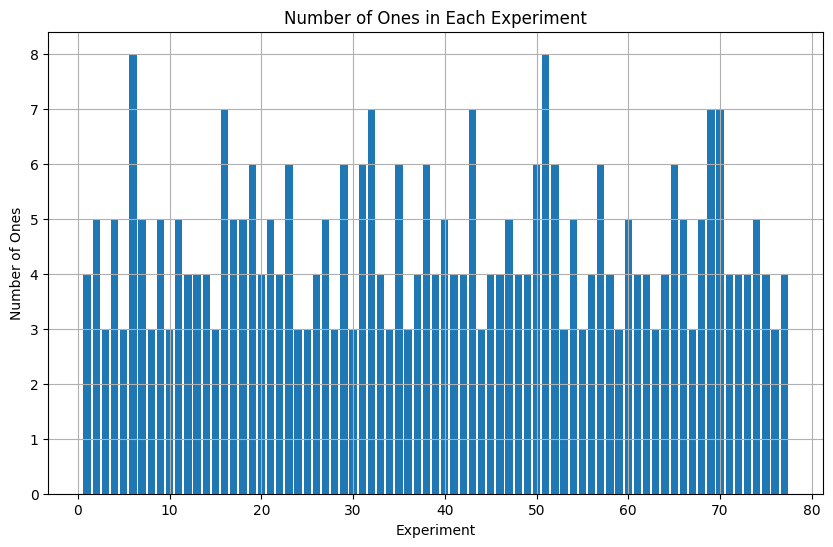

In [ ]:
for i in range(100):
  observations2[i]=observations2[i].tolist()
num_ones = [sum(obs) for obs in observations2 if sum(obs)>=3]

total_sequences_sum_3 = len(num_ones)
print("Total such sequences: ",total_sequences_sum_3)

total_ones=sum(num_ones)
print("Total number of ones in the", total_sequences_sum_3,"experiments:",total_ones)
print("Observed Probability of one:", total_ones/(20*total_sequences_sum_3))

#print("Total number of ones in the 100 experiments: ",total_ones)
#print("Observed Probability of one: ", total_ones/2000)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(num_ones) + 1), num_ones)
plt.xlabel('Experiment')
plt.ylabel('Number of Ones')
plt.title('Number of Ones in Each Experiment')
plt.grid(True)
plt.show()

Observation 1(d):

---

We observe that the total number of sequences where the number of ones is greater than or equal to 3 is 77. We plotted the histogram for these 77 sequences and we got the total number of ones to be 349 and the probability of one to be approximately 0.22. This is also a closer approximation of the Bernoulli PMF given the minimum success rate or the minimum number of ones per 20 trials is 3.

The given probability model approximately represents a conditional PMF of the number of ones obtained given the sum is at least 3.




**Question 2**


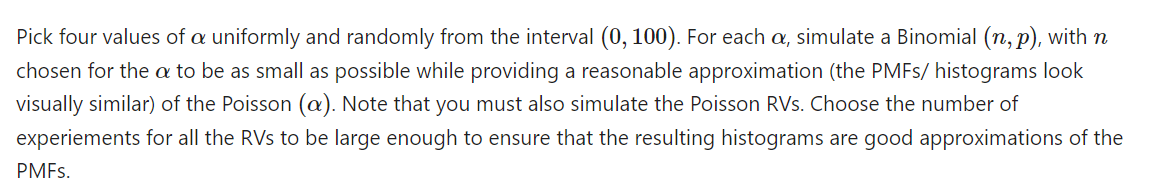

In [ ]:
def aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5, numberOfBinomialExperiments = 1, profitLoss_Bern = [1,0]):

    outcomesOfBernTrails = aBernoulliExperiment(randomNumGen, bernoulliParam_p=binomialParam_p, numRepeatsOfExp = numberOfBinomialExperiments, numTrialsInAnExp = binomialParam_n, profitLoss = profitLoss_Bern)

    #print(outcomesOfBernTrails, outcomesOfBernTrails.shape)

    outcomeOfBinomialExp = np.sum(outcomesOfBernTrails, axis = 1)#.reshape((numberOfBinomialExperiments,1)) #get a column vector

    #print(outcomeOfBinomialExp, outcomeOfBinomialExp.shape)

    return outcomeOfBinomialExp

We have to generate random values of alpha and using this we have to calculate values of "n" which is the number of Bernoulli trial in each Binomial experiment by using an appropriate value of p- let's say 0.2 in this case and plot the graph for each of those values of "n".

Thus, proceeding with generating random values of alpha:


In [ ]:
np.random.seed(50)  # Set the seed value
alpha_list = sorted(np.random.randint(0, 101, size=4))  # Generate random array
print("Random Values of alpha = ",alpha_list)

Random Values of alpha =  [11, 33, 48, 96]


Calculating values of n based on the generated values of alpha and taking p=0.2

In [ ]:
n_values=[0,0,0,0]
p_value=0.2
for i in range(4):
  n_values[i]=int(alpha_list[i]/p_value)
print("Corresponding values of n: ",n_values)

Corresponding values of n:  [55, 165, 240, 480]


Generating plots for different values of n with the code:


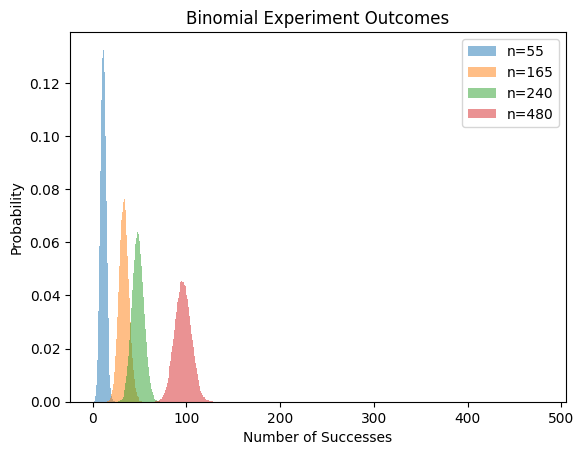

In [ ]:
outcomes_binomial_all=[]
for i in range(4):
  v_binomial_n = n_values[i]
  v_binomial_p = 0.2
  numberOfBinomialExps = 100000

  outcomeOfBinomialExp = aBinomialExperiment(np.random.default_rng(78918), v_binomial_n, v_binomial_p,numberOfBinomialExps, profitLoss_Bern=[1,0])#, [-10,10])
  outcomes_binomial_all.append(outcomeOfBinomialExp)
for i in range(4):
  outcomes_binomial_all[i]=outcomes_binomial_all[i].tolist()
#for i in range(4):
  #print(outcomes_binomial_all[i])

def plot_binomial_outcomes(outcomes_binomial_all, n_values):
    for i in range(len(outcomes_binomial_all)):
        plt.hist(outcomes_binomial_all[i], bins=range(n_values[i]+2), density=True, alpha=0.5, label=f'n={n_values[i]}')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.title('Binomial Experiment Outcomes')
    plt.legend()
    plt.show()
plot_binomial_outcomes(outcomes_binomial_all, n_values)


Making Poisson observations for each of the 4 alpha values:



In [ ]:
np.random.default_rng(8946729)

numberOfExperiments = 100000
outcomesOfPoissonExperiments=[]
for i in range(4):
  outcomeOfPoissonExperiments = np.ndarray((1,numberOfExperiments))
  outcomeOfPoissonExperiments = np.random.poisson(lam = alpha_list[i], size=outcomeOfPoissonExperiments.shape)
  outcomesOfPoissonExperiments.append(outcomeOfPoissonExperiments[0].tolist())

print("The outcomes of experiments are ")
for i in range(4):
  print(outcomesOfPoissonExperiments[i])

The outcomes of experiments are 
[14, 7, 11, 8, 9, 11, 10, 10, 12, 15, 8, 5, 10, 12, 10, 11, 10, 8, 12, 10, 10, 12, 11, 7, 10, 15, 6, 10, 9, 10, 7, 10, 10, 13, 5, 14, 11, 16, 11, 7, 18, 10, 13, 12, 13, 9, 15, 14, 12, 9, 12, 11, 8, 7, 16, 8, 12, 12, 12, 15, 10, 10, 11, 20, 6, 10, 12, 14, 8, 13, 6, 12, 16, 12, 7, 8, 10, 8, 14, 12, 11, 16, 8, 10, 6, 14, 15, 20, 11, 13, 14, 10, 9, 17, 8, 16, 10, 8, 8, 11, 5, 7, 9, 14, 9, 15, 13, 10, 8, 16, 12, 12, 11, 10, 16, 12, 10, 18, 11, 10, 17, 13, 12, 15, 11, 3, 6, 9, 12, 9, 8, 7, 10, 11, 8, 16, 13, 11, 10, 12, 5, 16, 7, 7, 13, 11, 11, 7, 14, 14, 4, 20, 10, 7, 13, 10, 11, 7, 10, 15, 14, 19, 19, 15, 10, 12, 5, 9, 12, 14, 13, 11, 7, 11, 12, 12, 12, 10, 7, 6, 11, 11, 11, 8, 14, 8, 11, 14, 15, 12, 5, 16, 11, 8, 13, 12, 16, 12, 12, 11, 11, 12, 10, 9, 9, 4, 9, 11, 13, 12, 12, 11, 9, 11, 12, 13, 8, 13, 12, 10, 9, 16, 11, 7, 12, 10, 14, 7, 11, 8, 8, 16, 15, 13, 6, 8, 16, 10, 11, 15, 13, 9, 9, 12, 13, 7, 12, 12, 15, 13, 7, 12, 8, 15, 16, 7, 10, 10, 7, 9, 17, 

Plotting the graphs for each of the four sets of outcomes:


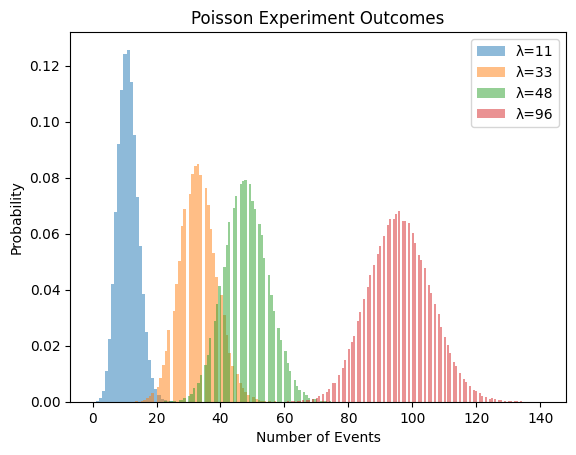

In [ ]:
def plot_poisson_outcomes(outcomes, alpha_list):
    for i in range(len(outcomes)):
        plt.hist(outcomes[i], bins=max(outcomes[i])+1, density=True, alpha=0.5, label=f'λ={alpha_list[i]}')
    plt.xlabel('Number of Events')
    plt.ylabel('Probability')
    plt.title('Poisson Experiment Outcomes')
    plt.legend()
    plt.show()
plot_poisson_outcomes(outcomesOfPoissonExperiments,alpha_list)

Observation 2

---

For each of these graphs of Binomial and Poisson Experiment each: The Binomial and Poisson Distributions look very similar for different values of alpha and corresponding values of "n".

This shows that using Binomial distribution with approapriately small values of "p", we can approximately get a Poission distribution corresponding to the same values of alpha.

Lambda in a Poisson distribution is the mean number of events that occur within a given interval of time or space which

**Question 3**

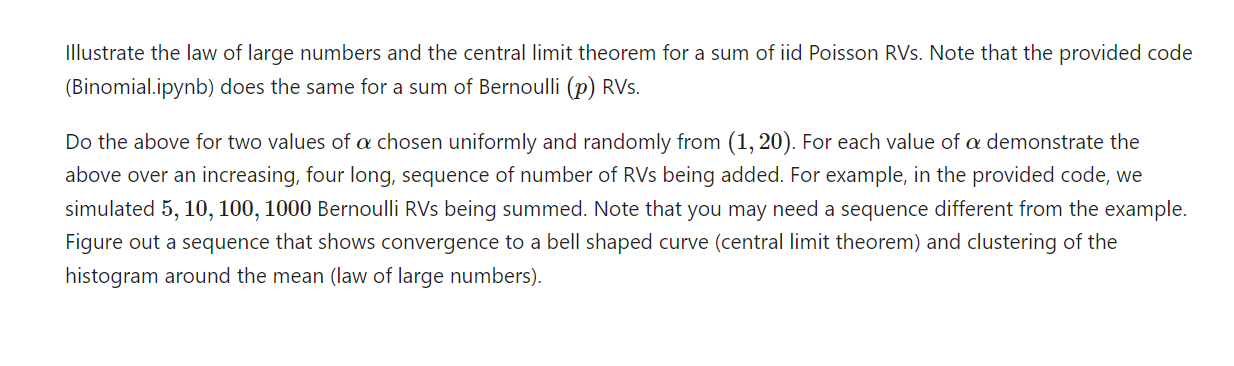




To illustrate the law of large numbers and central limit theorem for a sum of iid Poisson RVs, we need to generate two random values of alpha and and for different number of experiments in the following list, we have to obtain different plots.

In [4]:
np.random.seed(8)  # Set the seed value
alpha_list = sorted(np.random.randint(1, 21, size=2))  # Generate random array
print("Random Values of alpha = ",alpha_list)


Random Values of alpha =  [4, 18]


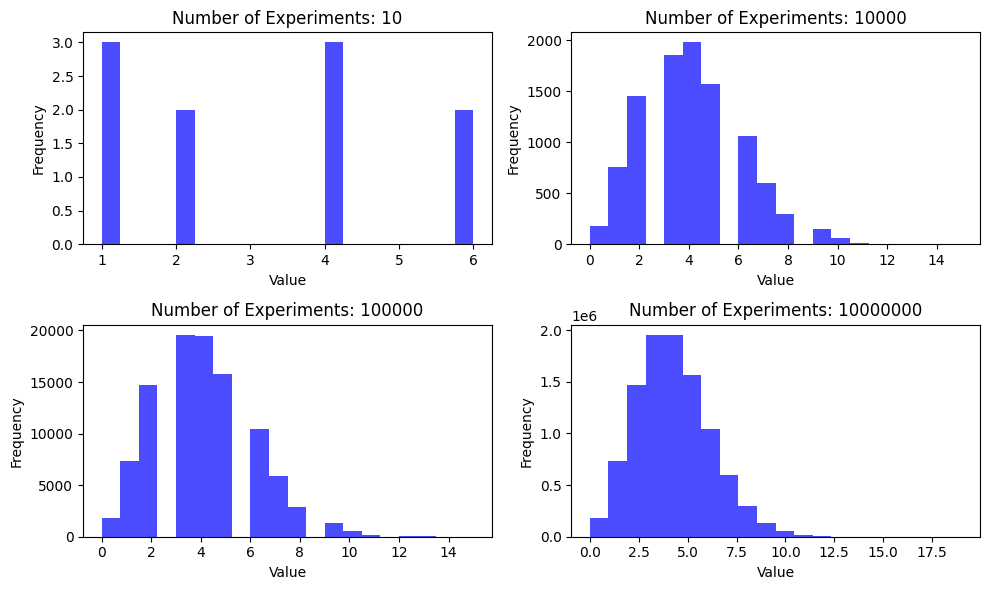

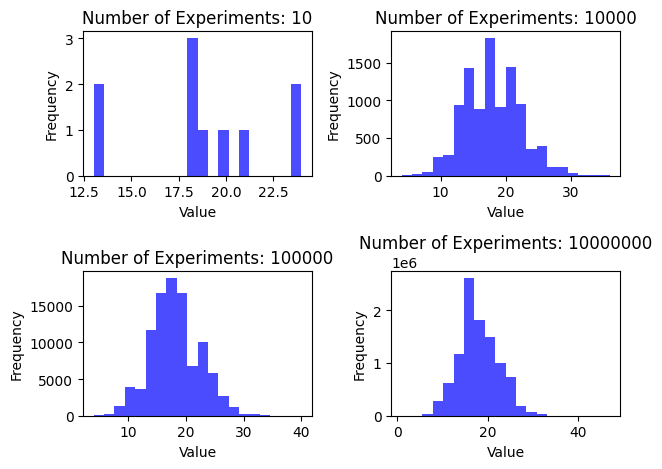

In [6]:
np.random.default_rng(8946729)

numberOfExperiments = [10,10000,100000,10000000]
outcomesOfPoissonExperiments=[]
for i in range(4):
  outcomeOfPoissonExperiments = np.ndarray((1,numberOfExperiments[i]))
  outcomeOfPoissonExperiments = np.random.poisson(lam = alpha_list[0], size=outcomeOfPoissonExperiments.shape)
  outcomesOfPoissonExperiments.append(outcomeOfPoissonExperiments[0].tolist())

plt.figure(figsize=(10, 6))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(outcomesOfPoissonExperiments[i], bins=20, color='blue', alpha=0.7)
    plt.title(f'Number of Experiments: {numberOfExperiments[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

outcomesOfPoissonExperiments=[]

for i in range(4):
  outcomeOfPoissonExperiments = np.ndarray((1,numberOfExperiments[i]))
  outcomeOfPoissonExperiments = np.random.poisson(lam = alpha_list[1], size=outcomeOfPoissonExperiments.shape)
  outcomesOfPoissonExperiments.append(outcomeOfPoissonExperiments[0].tolist())

print()

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(outcomesOfPoissonExperiments[i], bins=20, color='blue', alpha=0.7)
    plt.title(f'Number of Experiments: {numberOfExperiments[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#plot_poisson_outcomes(outcomesOfPoissonExperiments,alpha_list)


Observation 3

---

From the above graph, we can observe that as we increase the number of experiments of a certain probability finding model, we see that the shape converges towards a bell-shaped curve as seen in both the successions of four graphs with the two different values of alpha taken- this is evidence of the Central Limit Theorem which suggests that the curve of a distribution approaches a bell-shaped or Gaussian curve as n or number of experiments become large.

The curves also cluster around a particular value in each case- 4 in the first and 18 in the second which are equal to the corresponding values of alpha taken. This is evidence of the law of large numbers which states that the average of the results of many independent and identical random samples will converge to the true value, if it exists. The expected value of a Poisson distribution is its value of alpha or lambda which clearly is in line with the law of large numbers.

Hence, both the laws are illustrated by the given plots.
